# Join Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import os

In [2]:
mainpath = '/mnt/c/Users/ruben/OneDrive/Documentos/MachineLearning/udemy/Machine_Learning_Introduction/datasets'
red_wine_model_filename = 'wine/winequality-red.csv'
white_wine_model_filename = 'wine/winequality-white.csv'

red_wine_model = os.path.join(mainpath, red_wine_model_filename)
white_wine_model = os.path.join(mainpath, white_wine_model_filename)

red_wine = pd.read_csv(red_wine_model, sep=';')
white_wine = pd.read_csv(white_wine_model, sep=';')

In [3]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
red_wine.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

(array([ 37., 808., 969., 761., 765., 625., 427., 368., 110.,  28.]),
 array([ 8.  ,  8.62,  9.24,  9.86, 10.48, 11.1 , 11.72, 12.34, 12.96,
        13.58, 14.2 ]),
 <BarContainer object of 10 artists>)

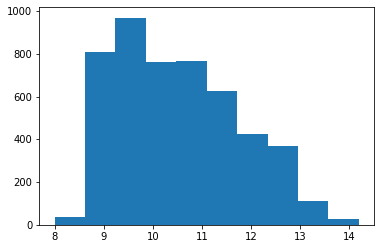

In [6]:
plt.hist(white_wine['alcohol'])

In [7]:
print(len(red_wine))
print(len(white_wine))

1599
4898


Tenemos dos tipos de ejes
* axis = 0 -> horizontal
* axis = 1 -> vertical

In [8]:
wine_data = pd.concat([red_wine, white_wine], axis=0)
wine_data.shape

(6497, 12)

In [9]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Carga de datos distribuidos

In [10]:
mainpath = '/mnt/c/Users/ruben/OneDrive/Documentos/MachineLearning/udemy/Machine_Learning_Introduction/datasets'
filepath = 'distributed-data/001.csv'

first_data = pd.read_csv(os.path.join(mainpath, filepath))

In [11]:
first_data.head()

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1


In [12]:
def add_number( path, index ):
    zeros = ''
    if index < 10:
        zeros = '00'
    elif index < 100:
        zeros = '0'
    
    return path + zeros + str(index) + '.csv'

In [13]:
path = os.path.join(mainpath, 'distributed-data/')
path

'/mnt/c/Users/ruben/OneDrive/Documentos/MachineLearning/udemy/Machine_Learning_Introduction/datasets/distributed-data/'

In [14]:
datasets = []
for i in range(1,50):
    current_file = add_number(path, i)
    current_dataset = pd.read_csv(current_file)
    datasets.append(current_dataset)



In [15]:
data = pd.concat(datasets, axis=0)

In [16]:
data.shape

(120158, 4)

In [17]:
data.head(10)

,Date,sulfate,nitrate,ID
0,2003-01-01,NaN,NaN,1
1,2003-01-02,NaN,NaN,1
2,2003-01-03,NaN,NaN,1
3,2003-01-04,NaN,NaN,1
4,2003-01-05,NaN,NaN,1
5,2003-01-06,NaN,NaN,1
6,2003-01-07,NaN,NaN,1
7,2003-01-08,NaN,NaN,1
8,2003-01-09,NaN,NaN,1
9,2003-01-10,NaN,NaN,1


## Join

In [22]:
filepath = 'datasets/athletes'
data_main = pd.read_csv(os.path.join(filepath,'Medals.csv'), encoding='ISO-8859-1')

In [23]:
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [27]:
data_filter = data_main['Athlete'].unique().tolist()
len(data_filter)

6956

In [33]:
data_country = pd.read_csv(os.path.join(filepath, 'Athelete_Country_Map.csv'), encoding='ISO-8859-1')
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [35]:
data_sports = pd.read_csv(os.path.join(filepath, 'Athelete_Sports_Map.csv'), encoding='ISO-8859-1')
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [46]:
data_country = data_country.drop_duplicates(subset='Athlete')
data_country.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [47]:
data_main_country = pd.merge(left=data_main, right=data_country, left_on='Athlete', right_on='Athlete')
data_main_country.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States


In [48]:
data_main_country.shape

(8618, 9)

In [49]:
data_main_country.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8613,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine
8614,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine
8615,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany
8617,Rod White,23.0,2000,10/01/2000,0,0,1,1,United States


In [50]:
data_main_country[ data_main_country['Athlete'] == 'Aleksandar Ciric']

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
1491,Aleksandar Ciric,30.0,2008,08/24/2008,0,0,1,1,Serbia
1492,Aleksandar Ciric,26.0,2004,08/29/2004,0,1,0,1,Serbia
1493,Aleksandar Ciric,22.0,2000,10/01/2000,0,0,1,1,Serbia


In [51]:
data_sports = data_sports.drop_duplicates(subset='Athlete')
len(data_sports)

6956

In [54]:
data_final = pd.merge(left=data_main_country, right=data_sports, left_on='Athlete', right_on='Athlete')
data_final.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country,Sport
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,United States,Swimming
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,United States,Swimming
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,United States,Swimming
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States,Swimming
4,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States,Swimming


## Tipos de Joins

In [55]:
from IPython.display import Image

In [71]:
deleted = np.random.choice(data_main['Athlete'], size=10, replace=False)

In [75]:
data_country = data_country[
    (~data_country['Athlete'].isin(deleted)) & 
    (data_country['Athlete'] != 'Michael Phelps')
]
data_country.head()

,Athlete,Country
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States
5,Ryan Lochte,United States


In [76]:
deleted_sports = np.random.choice(data_main['Athlete'], size=10, replace=False)

data_sports = data_sports[
    (~data_sports['Athlete'].isin(deleted_sports))
]
data_sports.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


In [78]:
deleted_main = np.random.choice(data_main['Athlete'], size=10, replace=False)

data_main = data_main[
    (~data_main['Athlete'].isin(deleted_main))
]
data_main.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


### Inner Join
* Devuelve un data frame con las filas que tienen valor tanto en el primer tanto como en el segundo dataset que estamos uniendo
* El número de filas será igual al número de filas comunes que tengan ambos datasets
    * Si len(A) = 60, len(B) = 50 y len(AnB) = 30, entonces len(innerJoin) == 30
* En términos de teoría de conjuntos, se tarta de la intersección de los dos conjuntos

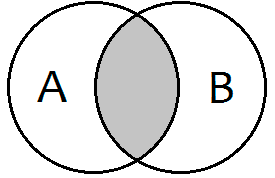

In [62]:
Image(filename='resources/inner-join.png')

In [82]:
merged_inner = pd.merge(left=data_main, right=data_country,left_on='Athlete', right_on='Athlete',how='inner')
merged_inner.head() # no se encuentra Michael Phelps

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
1,Natalie Coughlin,21.0,2004,08/29/2004,2,2,1,5,United States
2,Natalie Coughlin,29.0,2012,08/12/2012,0,0,1,1,United States
3,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia
4,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5,Australia


### Left Join
* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda, sin importar si tienen correspondencia en el de la derecha o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho tendrán NANs en las columnas del data frame derecho.
    * Si len(A) = 60, len(B) = 50, entonces len(left join) = 60
* En términos de teoría de conjuntos, se trata de A, adémas de la intersección

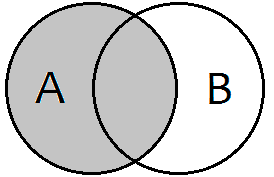

In [63]:
Image(filename='resources/left-join.png')

In [83]:
merged_left = pd.merge(left=data_main, right=data_country, left_on='Athlete', right_on='Athlete', how='left')
merged_left.head() #Contiene Michael Phelps pero sin country

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,Russia


### Right Join

Lo mismo que Left Join, pero para la derecha

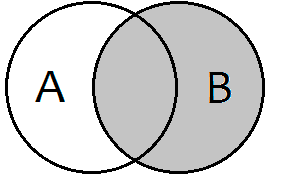

In [64]:
Image(filename='resources/right-join.png')

In [90]:
merged_right = pd.merge(left=data_main, right=data_country, left_on='Athlete', right_on='Athlete', how='right')
merged_right[merged_right['Athlete'].isin(deleted_main)] #solo aparece la info de country

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
934,Lee Seong-Jin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea
2082,Wu Jingyu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China
2974,Yi Siling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China
3084,Harald Stenvaag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norway
4126,Lucija Polavder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slovenia
4617,Sergey Samsonov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia
5059,Kari Aalvik Grimsbø,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norway
6115,Hajnalka Kiraly-Picot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
6448,Aleksandr Vinokurov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kazakhstan
6535,Sérgio Paulinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal


In [91]:
merged_right.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8593,Olena Sadovnycha,32.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8594,Kateryna Serdiuk,17.0,2000.0,10/01/2000,0.0,1.0,0.0,1.0,Ukraine
8595,Wietse van Alten,21.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Netherlands
8596,Sandra Wagner-Sachse,31.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,Germany
8597,Rod White,23.0,2000.0,10/01/2000,0.0,0.0,1.0,1.0,United States


### Outer Join

* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NANs en la región específica.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán NANs en las columnas del data frame derecho (o izquierdo).
    * Si len(A) = 60, len(B) = 50, len(AnB) = 30, Entonces len(Outer join) == 60 + 50 - 30 = 80
* En términos de teoría de conjuntos, se tarta de la unión de conjuntos.

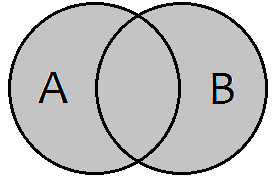

In [65]:
Image(filename='resources/outer-join.png')

In [92]:
merged_outer = pd.merge(left=data_main, right=data_country, left_on='Athlete', right_on='Athlete', how='outer')
merged_outer.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008.0,08/24/2008,8.0,0.0,0.0,8.0,NaN
1,Michael Phelps,19.0,2004.0,08/29/2004,6.0,0.0,2.0,8.0,NaN
2,Michael Phelps,27.0,2012.0,08/12/2012,4.0,2.0,0.0,6.0,NaN
3,Natalie Coughlin,25.0,2008.0,08/24/2008,1.0,2.0,3.0,6.0,United States
4,Natalie Coughlin,21.0,2004.0,08/29/2004,2.0,2.0,1.0,5.0,United States


In [93]:
merged_outer[merged_outer['Athlete'].isin(deleted_main)]

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8604,Lee Seong-Jin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Korea
8605,Wu Jingyu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China
8606,Yi Siling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,China
8607,Harald Stenvaag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norway
8608,Lucija Polavder,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Slovenia
8609,Sergey Samsonov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Russia
8610,Kari Aalvik Grimsbø,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Norway
8611,Hajnalka Kiraly-Picot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France
8612,Aleksandr Vinokurov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kazakhstan
8613,Sérgio Paulinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Portugal
